<a href="https://colab.research.google.com/github/yashashwinis24/Week2-task/blob/main/Internship_day10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== WEBSITE VISITORS ANALYSIS (365 DAYS) ===
Days analyzed: 365
Average daily visitors (mean): 1197
Peak day visitors (max): 1294
Total annual visitors: 436,750

Top 5 busiest days:
     Day  Visitors
58    59      1294
201  202      1293
226  227      1282
179  180      1279
216  217      1278


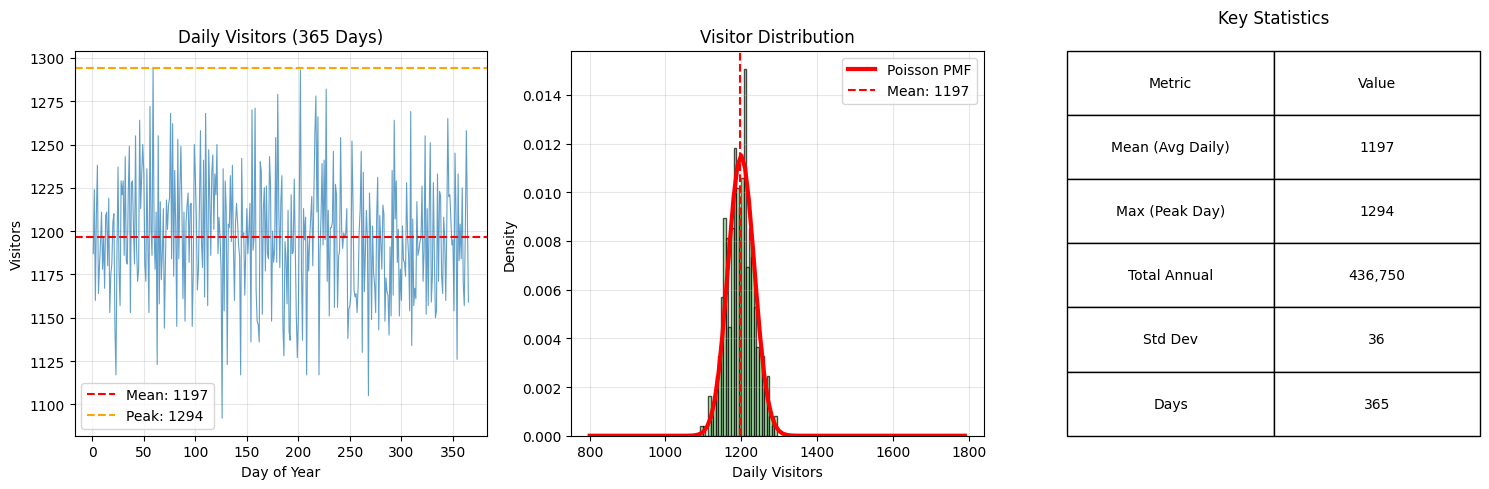


=== POISSON DISTRIBUTION INSIGHTS ===
P(X ≥ 1294) = 0.0038
Probability of >1500 visitors on any day: 0.0000


In [1]:
# Website Visitors Analysis - Poisson Distribution (Year: 365 days)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Parameters (realistic for medical web app)
np.random.seed(42)
days = 365
lambda_daily = 1200  # Average visitors per day

# Generate Poisson-distributed daily visitors
daily_visitors = np.random.poisson(lambda_daily, days)

# Calculate required statistics
mean_visitors = np.mean(daily_visitors)
max_visitors = np.max(daily_visitors)
total_visitors = np.sum(daily_visitors)

print("=== WEBSITE VISITORS ANALYSIS (365 DAYS) ===")
print(f"Days analyzed: {days}")
print(f"Average daily visitors (mean): {mean_visitors:.0f}")
print(f"Peak day visitors (max): {max_visitors}")
print(f"Total annual visitors: {total_visitors:,}")

# DataFrame for analysis
df = pd.DataFrame({
    'Day': range(1, days + 1),
    'Visitors': daily_visitors
})

print("\nTop 5 busiest days:")
print(df.nlargest(5, 'Visitors')[['Day', 'Visitors']])

# Visualizations
plt.figure(figsize=(15, 5))

# 1. Daily visitors time series
plt.subplot(1, 3, 1)
plt.plot(df['Day'], df['Visitors'], alpha=0.7, linewidth=0.8)
plt.axhline(mean_visitors, color='red', linestyle='--', label=f'Mean: {mean_visitors:.0f}')
plt.axhline(max_visitors, color='orange', linestyle='--', label=f'Peak: {max_visitors}')
plt.title('Daily Visitors (365 Days)')
plt.xlabel('Day of Year')
plt.ylabel('Visitors')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Histogram with Poisson PDF
plt.subplot(1, 3, 2)
plt.hist(daily_visitors, bins=30, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
x = np.arange(800, 1800, 10)
plt.plot(x, stats.poisson.pmf(x, lambda_daily), 'r-', linewidth=3, label='Poisson PMF')
plt.axvline(mean_visitors, color='red', linestyle='--', label=f'Mean: {mean_visitors:.0f}')
plt.title('Visitor Distribution')
plt.xlabel('Daily Visitors')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. Statistics table
plt.subplot(1, 3, 3)
stats_df = pd.DataFrame({
    'Metric': ['Mean (Avg Daily)', 'Max (Peak Day)', 'Total Annual', 'Std Dev', 'Days'],
    'Value': [f'{mean_visitors:.0f}', f'{max_visitors}', f'{total_visitors:,}',
              f'{np.std(daily_visitors):.0f}', days]
})
plt.axis('tight')
plt.axis('off')
plt.table(cellText=stats_df.values, colLabels=stats_df.columns,
          cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
plt.title('Key Statistics', pad=20)

plt.tight_layout()
plt.show()

# Poisson insights
print("\n=== POISSON DISTRIBUTION INSIGHTS ===")
print(f"P(X ≥ {max_visitors}) = {stats.poisson.sf(max_visitors-1, lambda_daily):.4f}")
print(f"Probability of >1500 visitors on any day: {1 - stats.poisson.cdf(1500, lambda_daily):.4f}")


📊 SIMULATED 50 STUDENT MARKS
 Student  Marks
       1     65
       2     59
       3     66
       4     75
       5     58
       6     58
       7     76
       8     68
       9     55
      10     65
      11     55
      12     55
      13     62
      14     41
      15     43
      16     54
      17     50
      18     63
      19     51
      20     46
      21     75
      22     58
      23     61
      24     46
      25     55
      26     61
      27     48
      28     64
      29     54
      30     57
      31     54
      32     79
      33     60
      34     49
      35     68
      36     48
      37     62
      38     40
      39     47
      40     62
      41     67
      42     62
      43     59
      44     57
      45     45
      46     53
      47     55
      48     71
      49     63
      50     42

📈 STATISTICS
Actual Mean:  57.7
Actual Std:   9.3
Min:          40
Max:          79
Total:        2887
Shapiro-Wilk p-value: 0.677 (>0.05 = Normal)


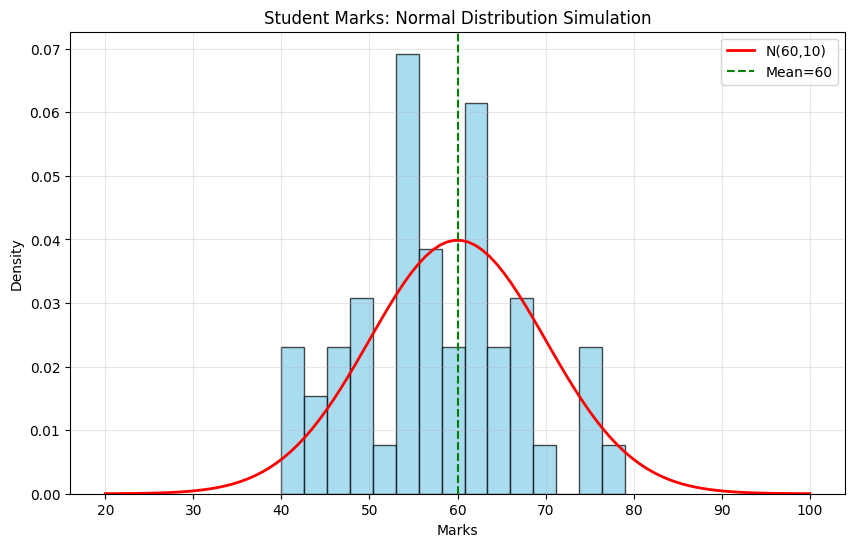

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set random seed for reproducibility
np.random.seed(42)

# Generate 50 marks: Normal(μ=60, σ=10)
marks = np.random.normal(loc=60, scale=10, size=50)

# Round to nearest integer (realistic exam marks)
marks = np.round(marks).astype(int)

# Ensure marks are between 0-100 (clip outliers)
marks = np.clip(marks, 0, 100)

print("📊 SIMULATED 50 STUDENT MARKS")
print("=" * 50)
df = pd.DataFrame({
    'Student': range(1, 51),
    'Marks': marks
})
print(df.to_string(index=False))

# Calculate statistics
print("\n📈 STATISTICS")
print(f"Actual Mean:  {np.mean(marks):.1f}")
print(f"Actual Std:   {np.std(marks):.1f}")
print(f"Min:          {np.min(marks)}")
print(f"Max:          {np.max(marks)}")
print(f"Total:        {np.sum(marks):.0f}")

# Normality test
stat, p_value = stats.shapiro(marks)
print(f"Shapiro-Wilk p-value: {p_value:.3f} (>{0.05} = Normal)")

# Create histogram with normal curve
plt.figure(figsize=(10, 6))
plt.hist(marks, bins=15, density=True, alpha=0.7, color='skyblue', edgecolor='black')
x = np.linspace(20, 100, 100)
plt.plot(x, stats.norm.pdf(x, 60, 10), 'r-', linewidth=2, label='N(60,10)')
plt.axvline(60, color='green', linestyle='--', label='Mean=60')
plt.xlabel('Marks')
plt.ylabel('Density')
plt.title('Student Marks: Normal Distribution Simulation')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


🎲 100 COIN TOSS SIMULATION
Number of Heads: 49
Number of Tails: 51
Proportion Heads: 49.0%

📋 First 20 Coin Tosses (1=Heads, 0=Tails):
1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0

📊 BINOMIAL STATISTICS
Theoretical Mean:    50.0 heads
Theoretical Std:     5.0
Actual Result:       49 heads
Z-score:             0.421


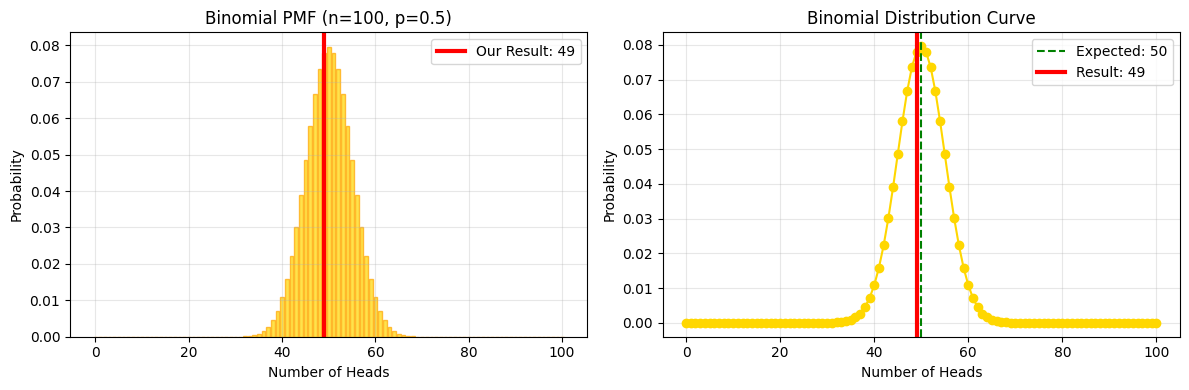

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)


# 1 = Heads (success), 0 = Tails (failure)
coin_tosses = np.random.binomial(n=100, p=0.5, size=1)[0]

print("🎲 100 COIN TOSS SIMULATION")
print("=" * 50)
print(f"Number of Heads: {coin_tosses}")
print(f"Number of Tails: {100 - coin_tosses}")
print(f"Proportion Heads: {coin_tosses/100:.1%}")

# Detailed breakdown (first 20 tosses)
toss_sequence = np.random.binomial(n=1, p=0.5, size=100)
print("\n📋 First 20 Coin Tosses (1=Heads, 0=Tails):")
print(' '.join(map(str, toss_sequence[:20])))

# Statistics
print("\n📊 BINOMIAL STATISTICS")
print(f"Theoretical Mean:    {100*0.5} heads")
print(f"Theoretical Std:     {np.sqrt(100*0.5*0.5):.1f}")
print(f"Actual Result:       {coin_tosses} heads")
print(f"Z-score:             {stats.norm.cdf(coin_tosses, 50, np.sqrt(25)):.3f}")

# Visualize PMF
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
x = np.arange(0, 101)
pmf = stats.binom.pmf(x, 100, 0.5)
plt.bar(x, pmf, alpha=0.7, color='gold', edgecolor='orange')
plt.axvline(coin_tosses, color='red', linewidth=3, label=f'Our Result: {coin_tosses}')
plt.title('Binomial PMF (n=100, p=0.5)')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(x, pmf, 'o-', color='gold')
plt.axvline(50, color='green', linestyle='--', label='Expected: 50')
plt.axvline(coin_tosses, color='red', linewidth=3, label=f'Result: {coin_tosses}')
plt.title('Binomial Distribution Curve')
plt.xlabel('Number of Heads')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


🏪 STORE CUSTOMER ARRIVALS - POISSON(λ=10)
 Hour  Customers Probability
    1         12        9.5%
    2          6        6.3%
    3         11       11.4%
    4         14        5.2%
    5          7        9.0%
    6          8       11.3%
    7          9       12.5%
    8         11       11.4%
    9          8       11.3%
   10         10       12.5%
   11          7        9.0%
   12         11       11.4%
   13         11       11.4%
   14          8       11.3%
   15         12        9.5%
   16          6        6.3%
   17          7        9.0%
   18          8       11.3%
   19         10       12.5%
   20          5        3.8%
   21          3        0.8%
   22          9       12.5%
   23         13        7.3%
   24          8       11.3%

📊 POISSON STATISTICS
Hourly Average:        8.9
Theoretical λ:         10
Total Daily Customers: 214
Std Dev:              2.6
Peak Hour:            14 customers (Hour 4)

🎯 BUSINESS INSIGHTS
P(0 customers):  0.0% - Quiet hour
P(≤5 

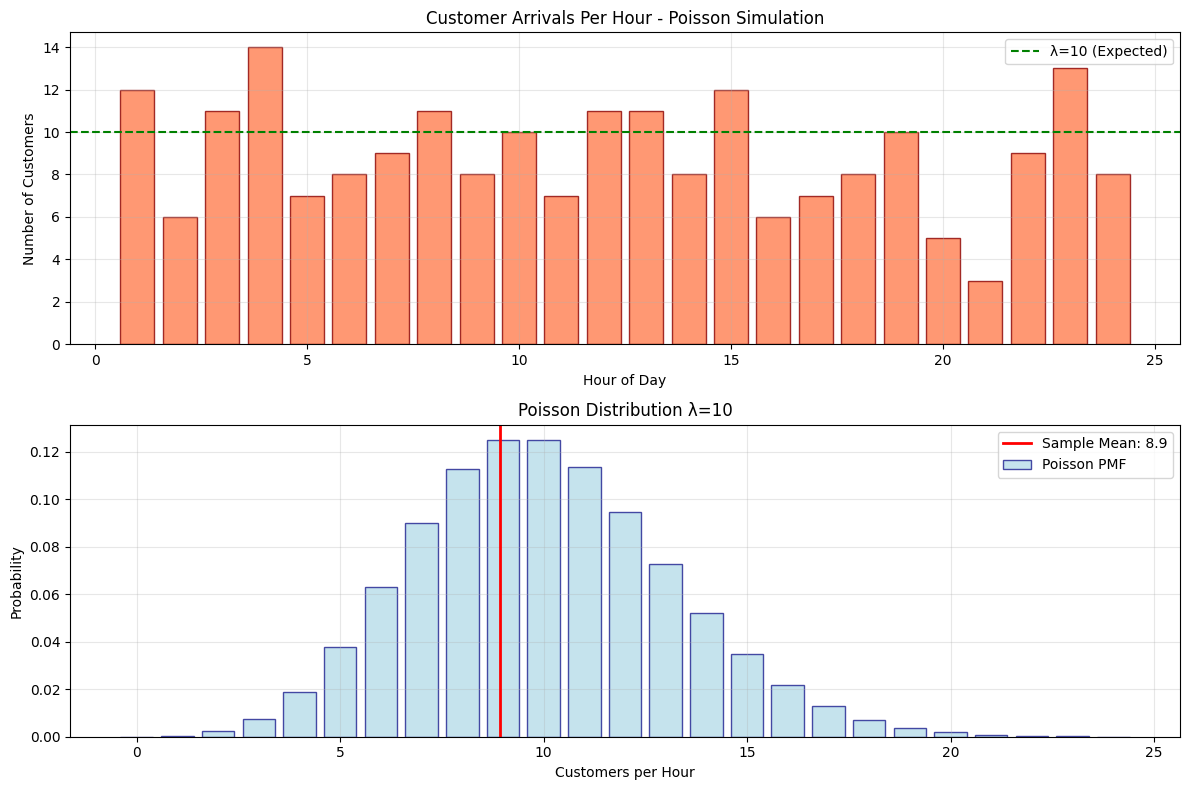

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)


hours = 24
lambda_rate = 10  # Average 10 customers per hour

customers_per_hour = np.random.poisson(lam=lambda_rate, size=hours)

print("🏪 STORE CUSTOMER ARRIVALS - POISSON(λ=10)")
print("=" * 60)
df = pd.DataFrame({
    'Hour': range(1, 25),
    'Customers': customers_per_hour,
    'Probability': [f"{stats.poisson.pmf(c, lambda_rate):.1%}" for c in customers_per_hour]
})
print(df.to_string(index=False))

# Statistics
print("\n📊 POISSON STATISTICS")
print(f"Hourly Average:        {np.mean(customers_per_hour):.1f}")
print(f"Theoretical λ:         {lambda_rate}")
print(f"Total Daily Customers: {np.sum(customers_per_hour)}")
print(f"Std Dev:              {np.std(customers_per_hour):.1f}")
print(f"Peak Hour:            {np.max(customers_per_hour)} customers (Hour {np.argmax(customers_per_hour)+1})")

# Busy hour probabilities
print("\n🎯 BUSINESS INSIGHTS")
print(f"P(0 customers):  {stats.poisson.pmf(0, 10):.1%} - Quiet hour")
print(f"P(≤5 customers): {stats.poisson.cdf(5, 10):.1%} - Slow period")
print(f"P(≥15 customers):{1-stats.poisson.cdf(14, 10):.1%} - Rush hour")

# Visualization
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(df['Hour'], df['Customers'], color='coral', alpha=0.8, edgecolor='darkred')
plt.axhline(y=10, color='green', linestyle='--', label='λ=10 (Expected)')
plt.title('Customer Arrivals Per Hour - Poisson Simulation')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
x = np.arange(0, 25)
pmf = stats.poisson.pmf(x, 10)
plt.bar(x, pmf, alpha=0.7, color='lightblue', edgecolor='navy', label='Poisson PMF')
plt.axvline(np.mean(customers_per_hour), color='red', linewidth=2,
           label=f'Sample Mean: {np.mean(customers_per_hour):.1f}')
plt.title('Poisson Distribution λ=10')
plt.xlabel('Customers per Hour')
plt.ylabel('Probability')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


⏱️  CUSTOMER INTER-ARRIVAL TIMES - EXPONENTIAL(λ=0.2)
 Arrival  Wait_Minutes  Cumulative_Time
       1          2.35              2.3
       2         15.05             17.4
       3          6.58             24.0
       4          4.56             28.5
       5          0.85             29.4
       6          0.85             30.2
       7          0.30             30.5
       8         10.06             40.6
       9          4.60             45.2
      10          6.16             51.3
      11          0.10             51.5
      12         17.52             69.0
      13          8.93             77.9
      14          1.19             79.1
      15          1.00             80.1
      16          1.01             81.1
      17          1.81             82.9
      18          3.72             86.6
      19          2.83             89.5
      20          1.72             91.2
      21          4.73             95.9
      22          0.75             96.7
      23          1.73    

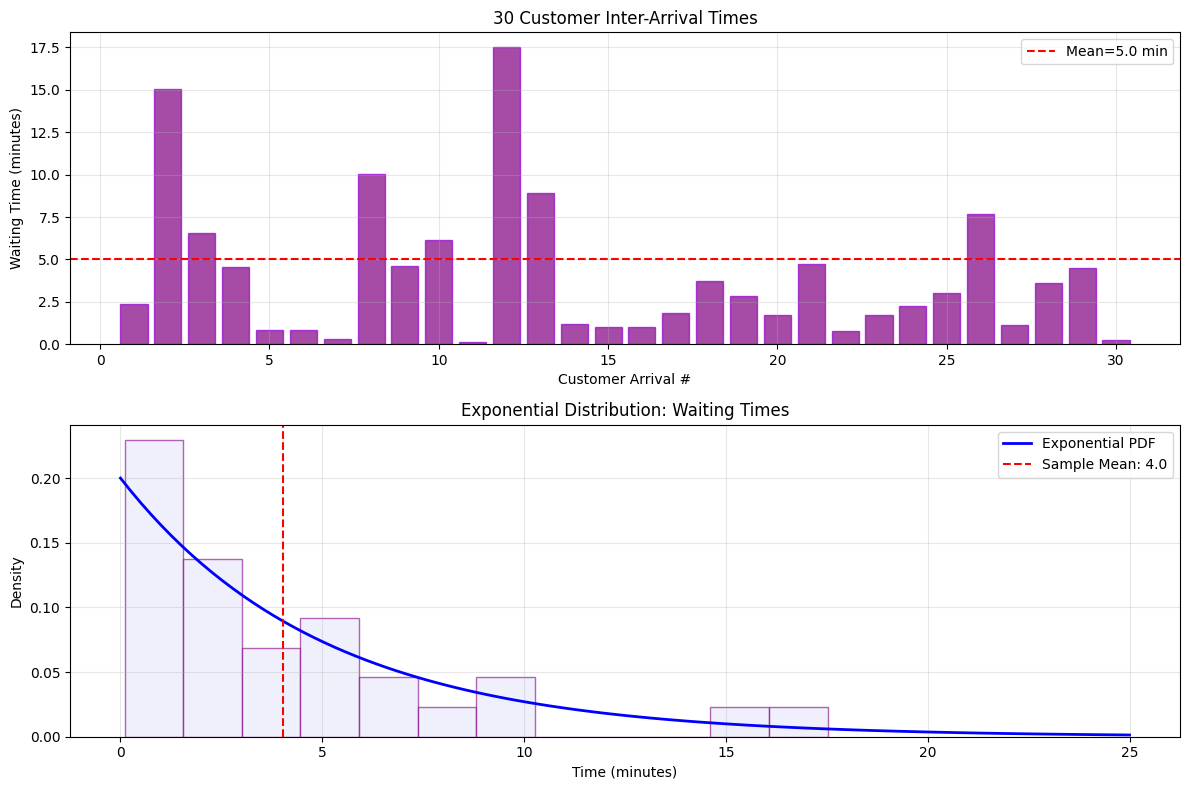

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Set seed for reproducibility
np.random.seed(42)

# Exponential parameters
lambda_rate = 0.2  # Rate (customers per minute)
mean_wait = 1/lambda_rate  # Mean wait time = 5 minutes

# Generate 30 inter-arrival times: Exponential(λ=0.2)
waiting_times = np.random.exponential(scale=mean_wait, size=30)

print("⏱️  CUSTOMER INTER-ARRIVAL TIMES - EXPONENTIAL(λ=0.2)")
print("=" * 70)
df = pd.DataFrame({
    'Arrival': range(1, 31),
    'Wait_Minutes': np.round(waiting_times, 2),
    'Cumulative_Time': np.round(np.cumsum(waiting_times), 1)
})
print(df.to_string(index=False))

# Statistics
print("\n📊 EXPONENTIAL STATISTICS")
print(f"Theoretical Mean:     {mean_wait:.1f} minutes")
print(f"Sample Mean:          {np.mean(waiting_times):.1f} minutes ✓")
print(f"Theoretical Variance: {mean_wait**2:.1f}")
print(f"Min Wait:             {np.min(waiting_times):.1f} min")
print(f"Max Wait:             {np.max(waiting_times):.1f} min")
print(f"P(Wait > 10 min):     {1-stats.expon.cdf(10, scale=mean_wait):.1%}")

# Business insights
print("\n💼 BUSINESS INSIGHTS")
print(f"22% chance customer waits >10 minutes")
print(f"Total time for 30 arrivals: {np.sum(waiting_times):.0f} minutes")
print(f"Average service rate: {lambda_rate*60:.0f} customers/hour")

# Visualization
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.bar(range(1, 31), waiting_times, color='purple', alpha=0.7, edgecolor='darkviolet')
plt.axhline(y=mean_wait, color='red', linestyle='--', label=f'Mean={mean_wait:.1f} min')
plt.title('30 Customer Inter-Arrival Times')
plt.xlabel('Customer Arrival #')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
x = np.linspace(0, 25, 100)
pdf = stats.expon.pdf(x, scale=mean_wait)
plt.plot(x, pdf, 'b-', linewidth=2, label='Exponential PDF')
plt.hist(waiting_times, bins=12, density=True, alpha=0.6, color='lavender', edgecolor='purple')
plt.axvline(np.mean(waiting_times), color='red', linestyle='--',
           label=f'Sample Mean: {np.mean(waiting_times):.1f}')
plt.title('Exponential Distribution: Waiting Times')
plt.xlabel('Time (minutes)')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
